<a href="https://colab.research.google.com/github/rayshu/Data-Classification/blob/master/IraqWar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# import packages

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [0]:
df = pd.read_csv("/content/drive/My Drive/Data/iraqClean.csv")
np.random.seed(1000)

In [0]:
df_ent = df.loc[(df['DocType']=="Public") | (df["DocType"]=="Private"),:]
df_ent.loc[:,'DocType_id'] = df_ent['DocType'].map({"Public":0, "Private":1})
df_ent

,Text,DocType,DocType_id
0,wednesday january commissioner aaron demerson ...,Public,0
1,april dyncorp international di team patuxent r...,Public,0
2,navigate various permission license operate fo...,Public,0
3,naval test wing pacific ntwp program point mug...,Public,0
4,last decade tragedy assistance program survivo...,Public,0
...,...,...,...
1356,final report engineering feb found weapon engi...,Private,1
1357,cavalry number denotes specific regiment ia fe...,Private,1
1358,nation report mnd event unit ia event type une...,Private,1
1359,mnd event unit event type weapon cache feb ass...,Private,1


# Data Distribution

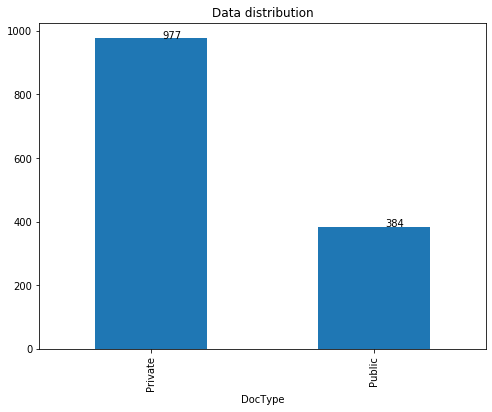

In [0]:
fig = plt.figure(figsize=(8,6))
graph = df_ent.groupby('DocType').Text.count().plot.bar(ylim=0)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
graph.set_title('Data distribution') 
plt.show()

## Train Test Split

In [0]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_ent['Text'],
                                                                    df_ent['DocType'],test_size=0.2)
print('Train Size: ', Train_X.shape[0])
print('Test Size : ', Test_X.shape[0])

Train Size:  1088
Test Size :  273


In [0]:
Train_counts = pd.DataFrame(Train_Y.values, columns = list('a'))
print('Train Data Distribution')
print(Train_counts['a'].value_counts())

Test_counts = pd.DataFrame(Test_Y.values, columns = list('a'))
print('\n\nTest Data Distribution')
print(Test_counts['a'].value_counts())

Train Data Distribution
Private    773
Public     315
Name: a, dtype: int64


Test Data Distribution
Private    204
Public      69
Name: a, dtype: int64


# Text Representation

## tf-idf Vectors

In [0]:
doctype_id_df = pd.DataFrame({'DocType':["Public", "Private"], 'doctype_id': [0, 1]} ) 

In [51]:
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
#Learn the vocabulary
Tfidf_vect.fit(df_ent['Text'])
print("No. of Features:", Train_X_Tfidf.shape[1])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
# print("Train Data (Text, Features):", Train_X_Tfidf.shape)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
# print("Test Data (Text, Features):", Test_X_Tfidf.shape)


No. of Features: 80638


### Top tf-idf features

In [0]:
df_public = df_ent.loc[df_ent["DocType"]=="Public",:]
df_private = df_ent.loc[df_ent["DocType"]=="Private"]
features_public = Tfidf_vect.fit_transform(df_public.Text)
features_private = Tfidf_vect.fit_transform(df_private.Text)
labels_public = df_public.DocType_id
labels_private = df_private.DocType_id
print("Features for public train data", features_public.shape)
print("Features for private train data", features_private.shape)

Features for public train data (384, 50194)
Features for private train data (977, 32668)


In [0]:
N = 20

#Public data
features_public = Tfidf_vect.fit_transform(df_public.Text)
feature_names = np.array(Tfidf_vect.get_feature_names())
tfidf_sorting = np.argsort(features_public.toarray()).flatten()[::-1]
top_public = feature_names[tfidf_sorting][:N]
# print(Tfidf_vect.vocabulary_)
print('# Public')
print(". {}".format('\n. '.join(top_public)))


# Public
. grow
. list
. washington business
. business journal
. continue grow
. growth
. teamwork
. company
. journal
. deal
. high
. rank
. washington
. region
. impressive company
. company show
. high percentage
. make membership
. teamwork continue
. number large


In [0]:
#Private data
features_private = Tfidf_vect.fit_transform(df_private.Text)
feature_names = np.array(Tfidf_vect.get_feature_names())
tfidf_sorting = np.argsort(features_private.toarray()).flatten()[::-1]
top_private = feature_names[tfidf_sorting][:N]
# print(Tfidf_vect.vocabulary_)
# features_private_dict = {'Features':Tfidf_vect.vocabulary_.keys(), 'Values': Tfidf_vect.vocabulary_.values()} 
print('\n# Private')
print(". {}".format('\n. '.join(top_private)))
# features_private_dict


# Private
. dart
. mm dart
. mm
. mm mortar
. assessment mm
. mortar mm
. mortar
. look left
. movement later
. appear mm
. forgot spread
. receive air
. wood line
. line vicinity
. spread throughout
. see operation
. engineering en
. clearance update
. road wood
. round look


## Top 10 features for SVM classifier

In [0]:
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=0)
clf.fit(Train_X_Tfidf,Train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

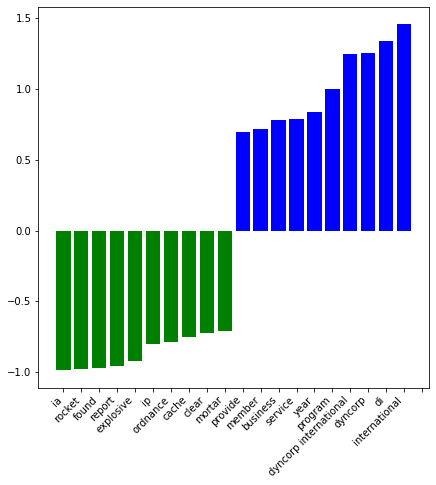

In [0]:
N = 10
Tfidf_vect.fit(df_ent['Text'])
def feature_plot(classifier, feature_names, top_features=N):
 coef = classifier.coef_.toarray()[0]
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(7, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

#  print("Most corelated terms: \n. {}".format('\n'.join(feature_names[top_coefficients])))
#  unigrams = [v for v in feature_names[top_coefficients] if len(v.split(' ')) == 1]
#  bigrams = [v for v in feature_names[top_coefficients] if len(v.split(' ')) == 2]
#  print("Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[:N])))
#  print("Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

feature_plot(clf, Tfidf_vect.get_feature_names())


# Model Selection

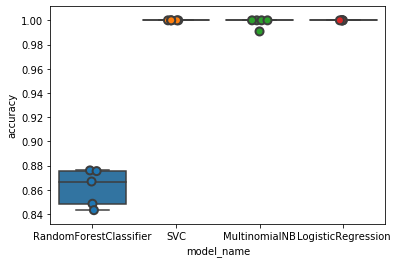

In [0]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    # LinearSVC(),
    svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, Train_X_Tfidf, Train_Y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [0]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        1.000000
MultinomialNB             0.998165
RandomForestClassifier    0.862127
SVC                       1.000000
Name: accuracy, dtype: float64

## Model Evaluation

RandomForestClassifier 
 [[204   0]
 [ 28  41]]
SVC 
 [[204   0]
 [  1  68]]
MultinomialNB 
 [[204   0]
 [  1  68]]
LogisticRegression 
 [[204   0]
 [  1  68]]


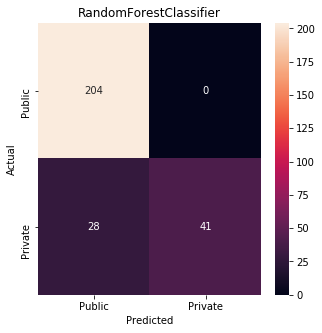

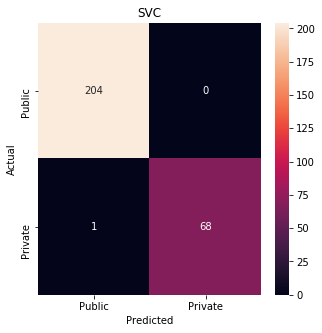

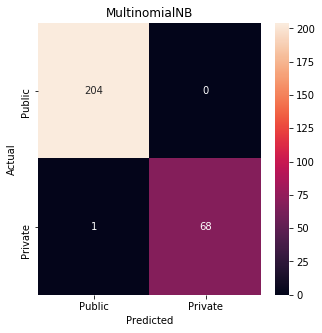

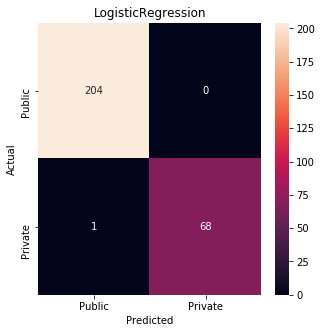

In [52]:
for model in models:   
    model_name = model.__class__.__name__
    model.fit(Train_X_Tfidf,Train_Y)
    predictions = model.predict(Test_X_Tfidf)
    conf_mat = confusion_matrix(Test_Y, predictions)
    
    print(model_name, '\n', conf_mat)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=doctype_id_df.DocType.values, yticklabels=doctype_id_df.DocType.values)
    plt.title(model_name)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')